## LeNet-5을 cifar-10에 적용
### LeNet-5 : CNN의 조상

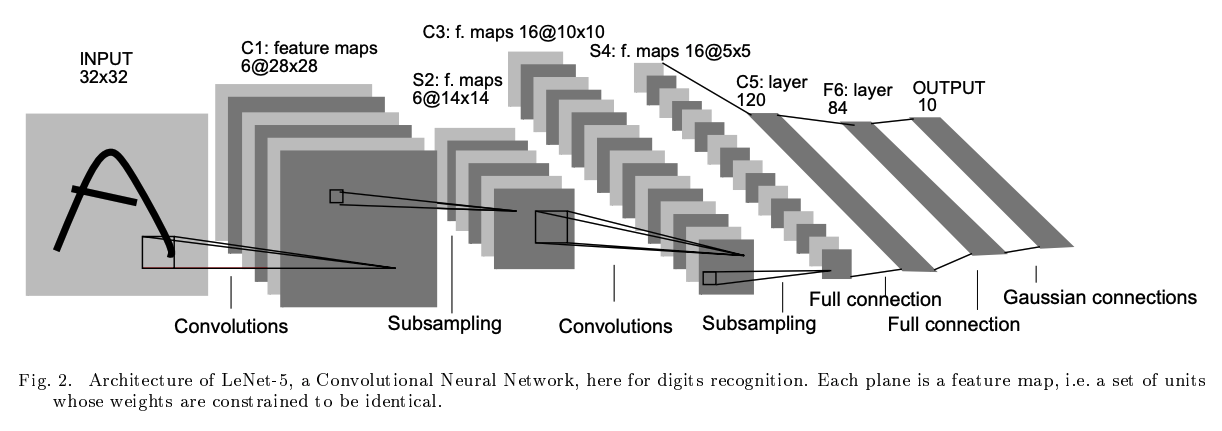

In [2]:
# 필요한 모듈 불러오기
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D, Dense

# 데이터를 준비하고
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x / 255.0

# 모델 설계
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', name='C1-layer'))
model.add(MaxPooling2D(pool_size=(2, 2), name='S2-layer'))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', name='C3-layer'))
model.add(MaxPooling2D(pool_size=(2, 2), name = 'S4-layer'))
model.add(Flatten())  # Flatten 하기

# FC-layer(분류기)
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# callback 데이터를 hist 변수에 저장
     # model.fit(train_x, train_y, epochs=10)
hist = model.fit(train_x, train_y, epochs=10)
            # fit()함수는 callback(학습이력) 데이터를 리턴함.
             # hist.history['loss'] : 훈련 데이터의 loss
             # hist.history['accuracy'] : 훈련 데이터의 accuracy
             # hist.history['val_loss'] : 검증 데이터의 loss
             # hist.history['val_accuracy'] : 검증 데이터의 accuracy

Epoch 1/10
1563/1563 [==============================] - 10s 4ms/step - loss: 1.6245 - accuracy: 0.4035
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3401 - accuracy: 0.5181
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2261 - accuracy: 0.5614
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1494 - accuracy: 0.5918
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0919 - accuracy: 0.6117
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0335 - accuracy: 0.6344
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9899 - accuracy: 0.6493
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9478 - accuracy: 0.6641
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9156 - accuracy: 0.6748
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8

## Keras의 모델 학습과정 시각화



```
fit()함수는 학습 이력(History) 정보를 callback 객체로 리턴함.  
* loss : 훈련 손실값(train set에 대한)  
* accuracy : 훈련 정확도(train set에 대한)  
* val_loss : 검증 손실값(validation 셋을 지정했을 때만)   
* val_accuracy : 검증 정확도(validation set을 지정했을 때만)
```



### 학습이력(history) 데이터 살펴보기



In [3]:
hist # callback 데이터가 저장된 변수 보기

In [4]:
hist.history
# 각 epoch별로 'loss'(실제값과 예측값의 차이의 합)과 'accuracy'정확도 데이터가 들어 있음.

{'loss': [1.624475359916687,
  1.3401384353637695,
  1.2261091470718384,
  1.1494420766830444,
  1.0918662548065186,
  1.0334627628326416,
  0.9899017810821533,
  0.9478453397750854,
  0.9155927896499634,
  0.8776038885116577],
 'accuracy': [0.40351998805999756,
  0.5181000232696533,
  0.5613800287246704,
  0.5918200016021729,
  0.6116799712181091,
  0.6344000101089478,
  0.6492599844932556,
  0.664139986038208,
  0.674780011177063,
  0.692080020904541]}

In [5]:
# loss만 보기
hist.history['loss']

[1.624475359916687,
 1.3401384353637695,
 1.2261091470718384,
 1.1494420766830444,
 1.0918662548065186,
 1.0334627628326416,
 0.9899017810821533,
 0.9478453397750854,
 0.9155927896499634,
 0.8776038885116577]

In [6]:
# accuracy만 보기
hist.history['accuracy']

[0.40351998805999756,
 0.5181000232696533,
 0.5613800287246704,
 0.5918200016021729,
 0.6116799712181091,
 0.6344000101089478,
 0.6492599844932556,
 0.664139986038208,
 0.674780011177063,
 0.692080020904541]

In [7]:
# 학습이력(history)를 판다스로 예쁘게 보기
import pandas as pd

hist_df = pd.DataFrame(hist.history)
hist_df

,loss,accuracy
0,1.624475,0.40352
1,1.340138,0.51810
2,1.226109,0.56138
3,1.149442,0.59182
4,1.091866,0.61168
5,1.033463,0.63440
6,0.989902,0.64926
7,0.947845,0.66414
8,0.915593,0.67478
9,0.877604,0.69208


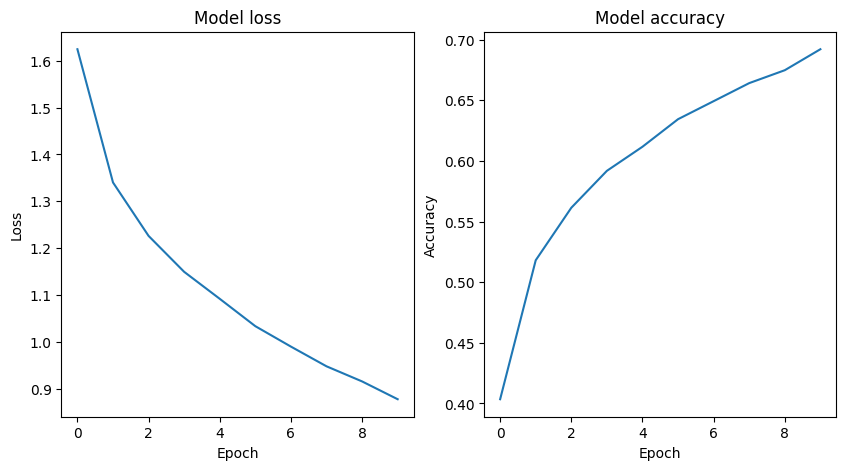

In [9]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# loss 시각화
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])  # 훈련용 셋에 대한 loss
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# accuracy 시각화
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy']) # 훈련용 셋에 대한 accuracy
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# 그래프 출력하기
plt.show()

## 계속 학습을 하면 loss는 낮아지고, accuracy는 더 높아질 것 같다.
### **더 학습 시켜 accuracy가 90%가 되면, 이 모델은 좋은 모델이 될까?**

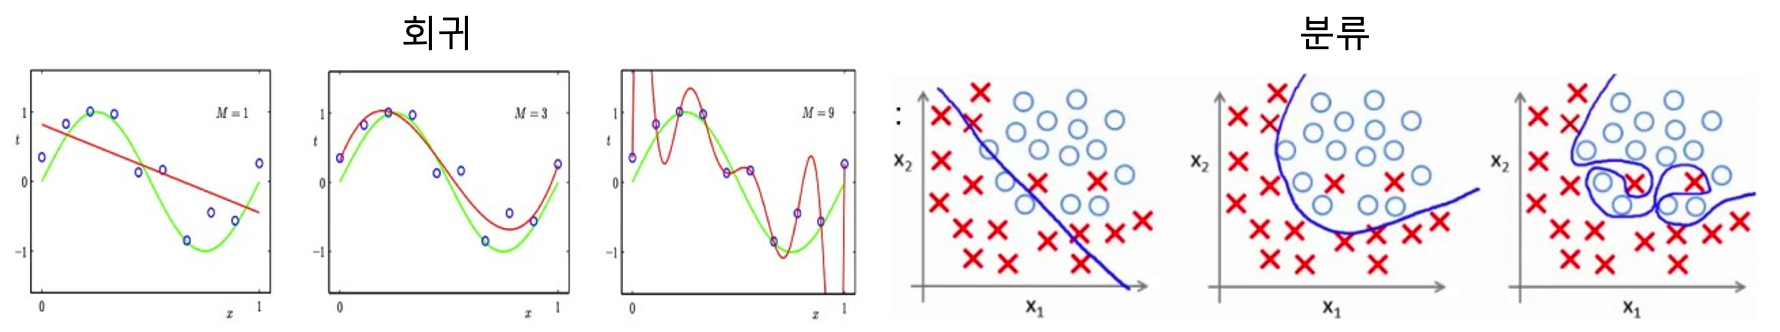

## 그림에서 언제(Epoch)까지 학습한 데이터가 모르는 데이터를 잘 예측할 수 있을까?

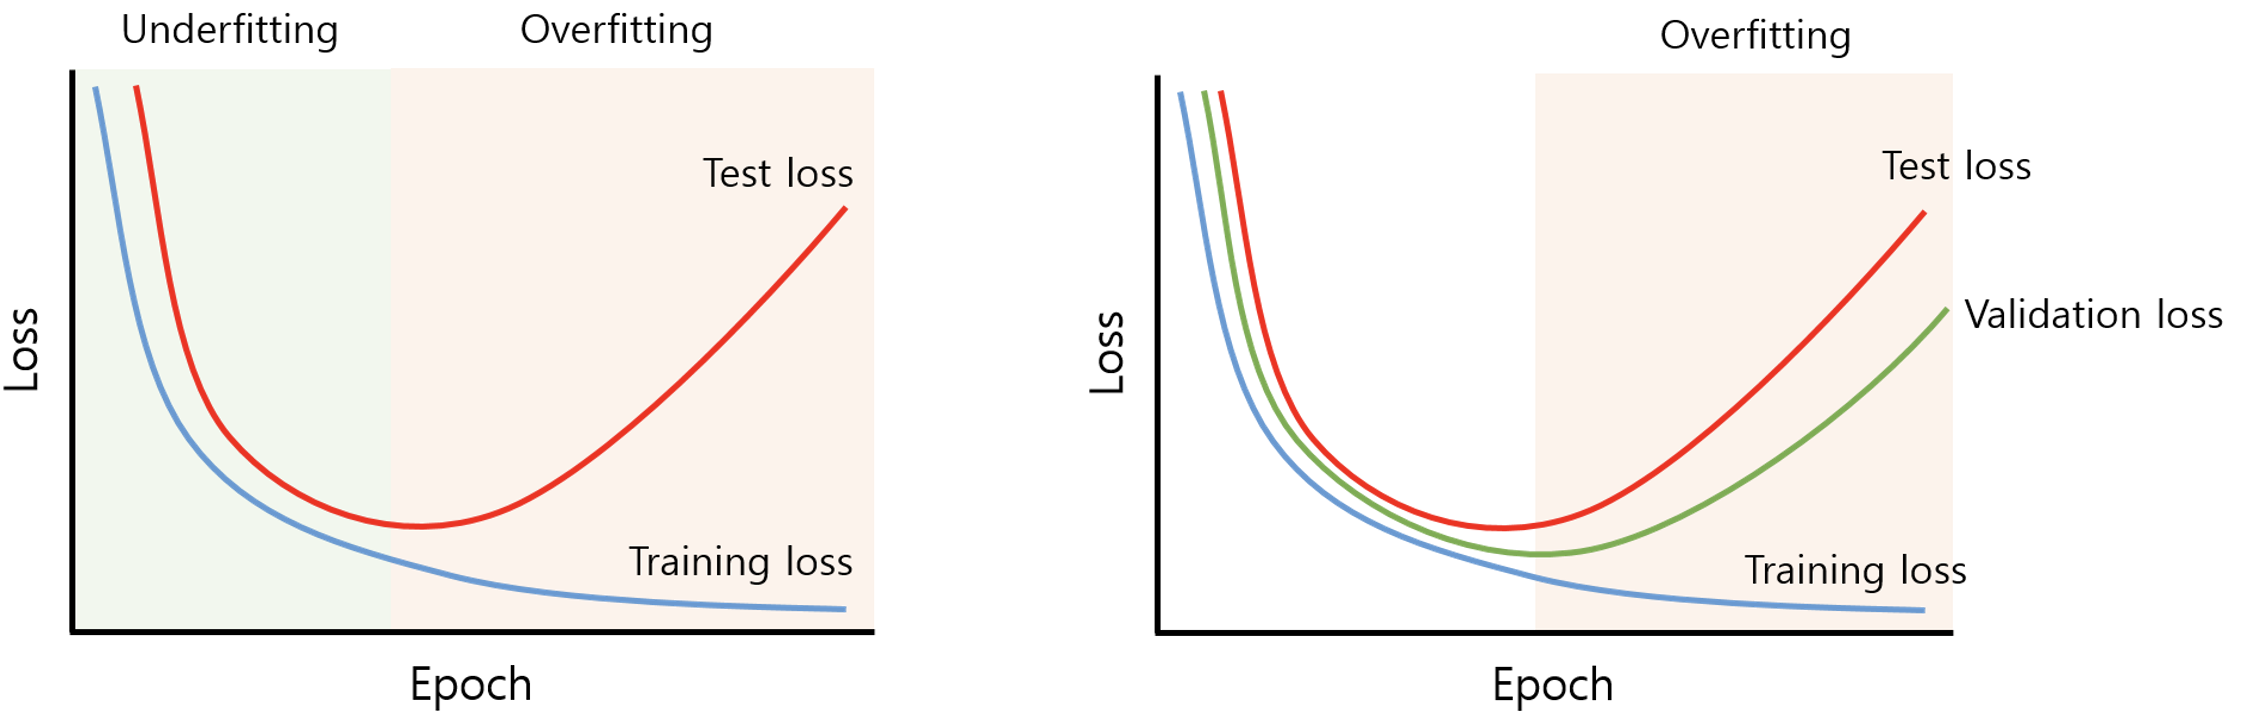

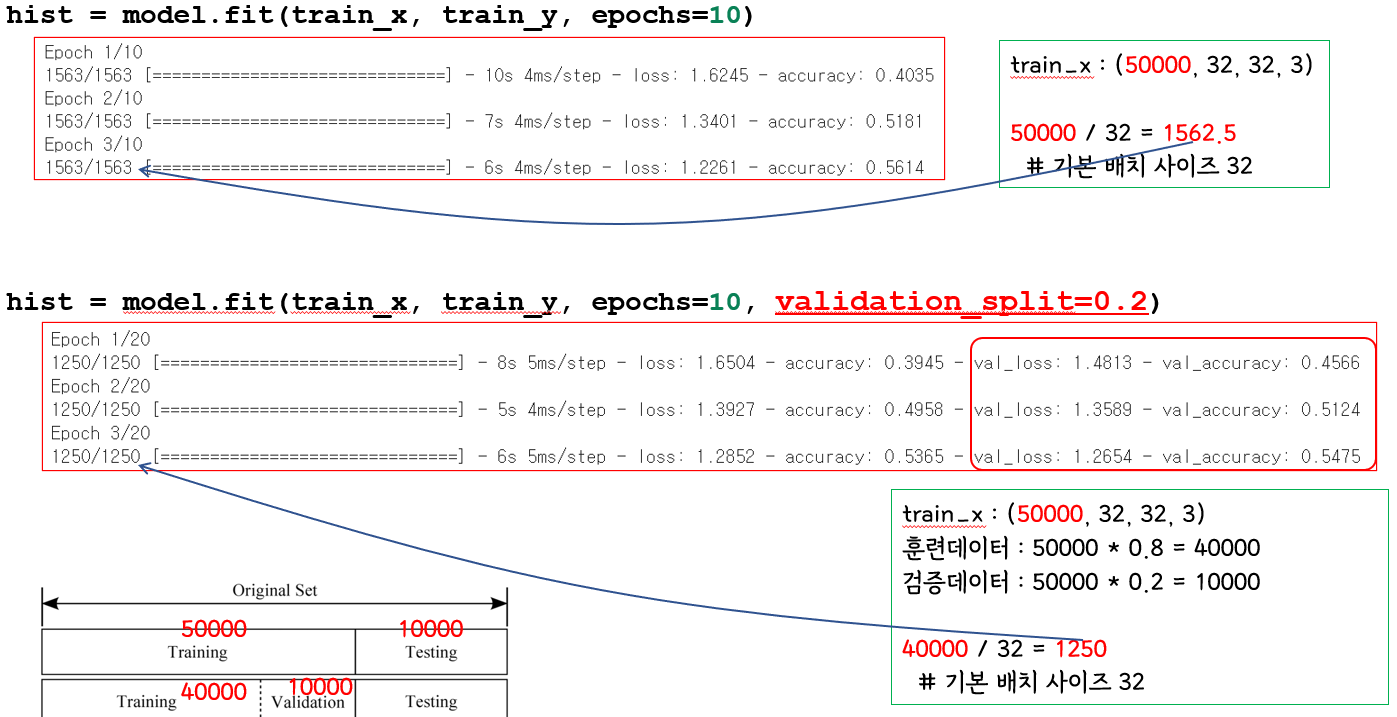

# cifar-10 CNN - train set에서 20%를 분리해, Validation set으로 사용 --> 과적합 시점 찾기

In [10]:
# 필요한 모듈 불러오기
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D, Dense

# 데이터를 준비하고
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x / 255.0

# 모델 설계
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', name='C1-layer'))
model.add(MaxPooling2D(pool_size=(2, 2), name='S2-layer'))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', name='C3-layer'))
model.add(MaxPooling2D(pool_size=(2, 2), name = 'S4-layer'))
model.add(Flatten())  # Flatten 하기

# FC-layer(분류기)
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# validation_split=0.2 (train_set 중 20%를 validation set으로 사용)
      # hist = model.fit(train_x, train_y, epochs=20) # 검증 데이터를 사용하지 않음.
hist = model.fit(train_x, train_y, epochs=10, validation_split=0.2)  # 훈련 데이터 중 20%를 검증 데이터로 사용함

Epoch 1/20
1250/1250 [==============================] - 8s 5ms/step - loss: 1.6504 - accuracy: 0.3945 - val_loss: 1.4813 - val_accuracy: 0.4566
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3927 - accuracy: 0.4958 - val_loss: 1.3589 - val_accuracy: 0.5124
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2852 - accuracy: 0.5365 - val_loss: 1.2654 - val_accuracy: 0.5475
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2103 - accuracy: 0.5704 - val_loss: 1.2322 - val_accuracy: 0.5712
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1528 - accuracy: 0.5867 - val_loss: 1.1890 - val_accuracy: 0.5831
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1013 - accuracy: 0.6080 - val_loss: 1.1893 - val_accuracy: 0.5852
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0523 - accuracy: 0.6274 - val_loss: 1.1696 - val_accuracy:

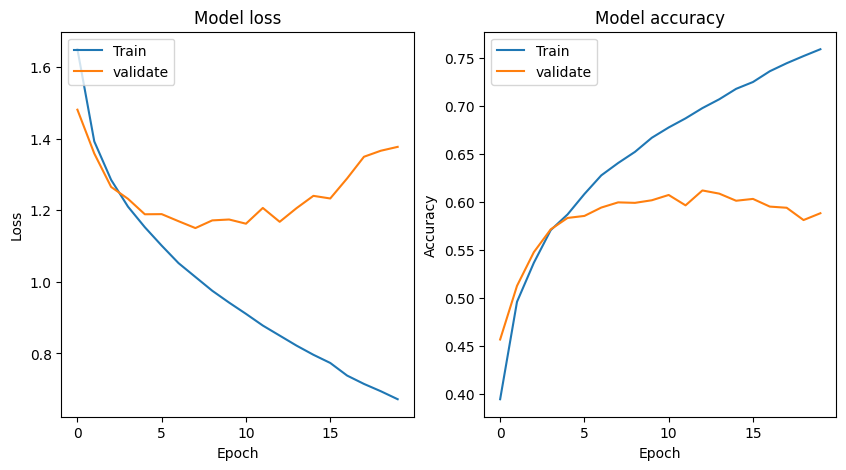

In [11]:
# 학습이력(history) 시각화 해보기
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# loss 시각화
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])          # 훈련 셋에 대한 loss
plt.plot(hist.history['val_loss'])      # 검증 셋에 대한 loss
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'validate'], loc='upper left')

# accuracy 시각화
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'])      # 훈련 셋에 대한 accuracy
plt.plot(hist.history['val_accuracy'])  # 검증 셋에 대한 accuracy
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'validate'], loc='upper left')

# 그래프 출력
plt.show()

# 과대적합 방지를 위한 학습 조기 종료 조건 넣기

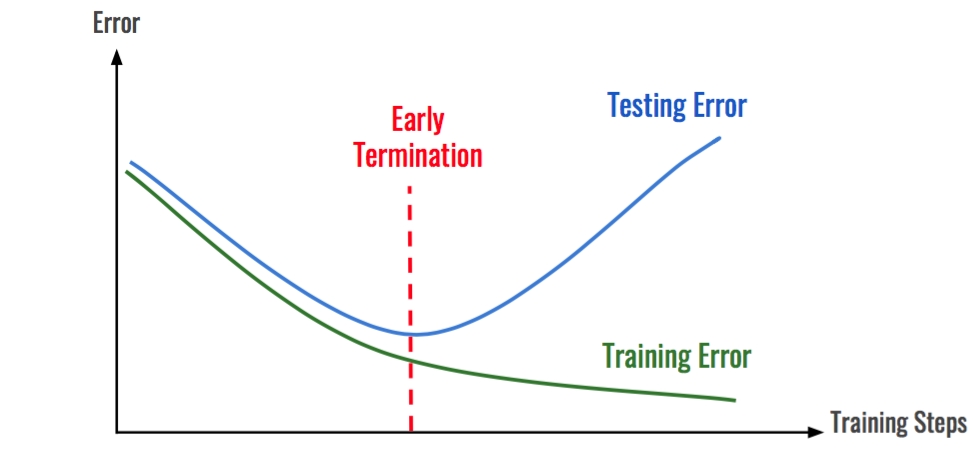

```
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
model.fit(X_train, Y_train, epoch = 1000, callbacks = [early_stopping])
```
> monitor : 학습 조기종료를 위해 관찰하는 항목입니다. val_loss 나 val_accuracy 가 주로 사용됩니다. (default : val_loss)  
> min_delta : 개선되고 있다고 판단하기 위한 최소 변화량을 나타냅니다. 만약 변화량이 min_delta 보다 적은 경우에는 개선이 없다고 판단합니다. (default = 0)  
> patience : 개선이 안된다고 바로 종료시키지 않고, 개선을 위해 몇번의 에포크를 기다릴지 설정합니다. (default = 0)  
> mode : 관찰항목에 대해 개선이 없다고 판단하기 위한 기준을 설정합니다.   
> monitor에서 설정한 항목이 val_loss 이면 값이 감소되지 않을 때 종료하여야 하므로 min 을 설정하고, val_accuracy 의 경우에는 max를 설정해야 합니다. (default = auto)
>> auto : monitor에 설정된 이름에 따라 자동으로 지정합니다.  
>> min : 관찰값이 감소하는 것을 멈출 때, 학습을 종료합니다.  
>> max: 관찰값이 증가하는 것을 멈출 때, 학습을 종료합니다.  

In [ ]:
# 필요한 모듈 불러오기
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D, Dense
from tensorflow.keras.callbacks import EarlyStopping   # EarlyStopping 함수 추가 : callback값에 따라 조기 종료 설정 함수

# 데이터를 준비하고
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x / 255.0

# 모델 설계
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', name='C1-layer'))
model.add(MaxPooling2D(pool_size=(2, 2), name='S2-layer'))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', name='C3-layer'))
model.add(MaxPooling2D(pool_size=(2, 2), name = 'S4-layer'))
model.add(Flatten())  # Flatten 하기

# FC-layer(분류기)
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 검증셋의 loss가 3번 이상 감소하지 않으면,
# elrly_stopping = EarlyStopping(monitor = 'val_loss', patience = 3)

# 검증셋의 accuracy가 3번 이상 증가하지 않으면
# elrly_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 3)

hist = model.fit(train_x, train_y, batch_size=32, epochs=3000, validation_split=0.2, callbacks=[elrly_stopping])

## VGG16 CNN모델 적용해 보기

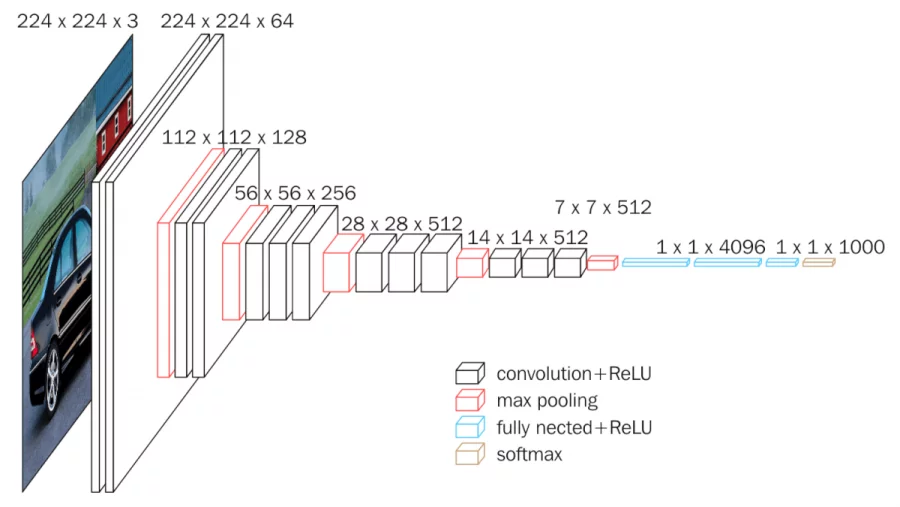

## VGG16 CNN 모델 적용1
https://brave-greenfrog.tistory.com/47


In [ ]:
# 필요한 모듈 불러오기
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D, Dense

# 데이터를 준비하고
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x / 255.0

# 모델 설계
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))  # padding='same'???
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(train_x, train_y, epochs=10, validation_split=0.2)

In [ ]:
# 학습이력(history) 시각화 해보기
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# loss 시각화
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])          # 훈련 셋에 대한 loss
plt.plot(hist.history['val_loss'])      # 검증 셋에 대한 loss
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'validate'], loc='upper left')

# accuracy 시각화
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'])      # 훈련 셋에 대한 accuracy
plt.plot(hist.history['val_accuracy'])  # 검증 셋에 대한 accuracy
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'validate'], loc='upper left')

# 그래프 출력
plt.show()

## VGG16 CNN 모델 적용2

### learning rate 조정하기(하이퍼파라미터 튜닝)
https://keras.io/api/optimizers/adam/

```
평소 아래와 같이 optimizer='adam'이라 설정한다면,
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
아래에 설정된 값이 그대로 적용, 즉, learning rate는 0.001
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="Adam",
    **kwargs
)
```
```
learning rate를 변경하고 싶다면?
from tensorflow.keras.optimizers import Adam   # Adam함수 import

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam') 을
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.00001)) 으로
아래에 설정된 값이 그대로 적용, 즉, learning rate는 0.001
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="Adam",
    **kwargs
)
```


In [ ]:
# 필요한 모듈 불러오기
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D, Dense
from tensorflow.keras.optimizers import Adam   # Adam함수 import   #################

# 데이터를 준비하고
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x / 255.0

# 모델 설계
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation='softmax'))

#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=????), metrics=['accuracy'])

hist = model.fit(train_x, train_y, batch_size=32, epochs=10, validation_split=0.2)

In [ ]:
# 학습이력(history) 시각화 해보기
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# loss 시각화
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])          # 훈련 셋에 대한 loss
plt.plot(hist.history['val_loss'])      # 검증 셋에 대한 loss
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'validate'], loc='upper left')

# accuracy 시각화
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'])      # 훈련 셋에 대한 accuracy
plt.plot(hist.history['val_accuracy'])  # 검증 셋에 대한 accuracy
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'validate'], loc='upper left')

# 그래프 출력
plt.show()

## VGG16 CNN 모델 적용3
### batch size 변경해 보기

In [ ]:
# 필요한 모듈 불러오기
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D, Dense
from tensorflow.keras.optimizers import Adam   # Adam함수 import

# 데이터를 준비하고
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x / 255.0

# 모델 설계
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=????), metrics=['accuracy'])

hist = model.fit(train_x, train_y, batch_size=????, epochs=10, validation_split=0.2)

In [ ]:
# 학습이력(history) 시각화 해보기
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# loss 시각화
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])          # 훈련 셋에 대한 loss
plt.plot(hist.history['val_loss'])      # 검증 셋에 대한 loss
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'validate'], loc='upper left')

# accuracy 시각화
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'])      # 훈련 셋에 대한 accuracy
plt.plot(hist.history['val_accuracy'])  # 검증 셋에 대한 accuracy
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'validate'], loc='upper left')

# 그래프 출력
plt.show()

# Keras에서 VGG16 모델 가져오기
```
tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
```



In [ ]:
# 필요한 모듈 불러오기
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.vgg16 import VGG16		# VGG16 모델
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D, Dense
from tensorflow.keras.optimizers import Adam   # Adam함수 import

# 데이터를 준비하고
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x / 255.0

model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(32, 32, 3)))
    # weights : 가중치 모델 지정 ( None : 초기화된 가중치, 'imagenet' : 사전 학습된 가중치 )
    # include_top : 신경망 FC 층 존재 유무 ( False : 제거 / True : 유지 )
    # input_tensor : 입력 텐서 크기 ( Input(shape = (w, h, ch))


model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

hist = model.fit(train_x, train_y, batch_size=64, epochs=10, validation_split=0.2)

model.summary()